In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
import itertools
import numpy as np
        
import argparse
import glob

print("hello")

hello


In [148]:
# import required module
from pathlib import Path
 
# get the path/directory
folder_dir = r'C:\Users\RIMSHA\ML-project\dataset\train\z'
path_to_save = r'C:\Users\RIMSHA\ML-project\dataset\train\z\hand_z_'

i=0
# iterate over files in
# that directory
files = Path(folder_dir).glob('*.jpeg')
for file in files:
    print(file)
    image = cv2.imread(str(file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, image = cv2.threshold(image,5, 255, cv2.THRESH_BINARY)
    cv2.imwrite(str(path_to_save) + str(i) + '.jpeg', image)
    i += 1

C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_bot_seg_1_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_bot_seg_2_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_bot_seg_3_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_bot_seg_4_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_bot_seg_5_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_dif_seg_1_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_dif_seg_2_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_dif_seg_3_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_dif_seg_4_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_dif_seg_5_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_left_seg_1_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_left_seg_2_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\train\z\hand1_z_left_seg_3_cropped.jpeg
C:\Users\RIMSHA\ML-project\dataset\

Found 2520 images belonging to 36 classes.
Found 2520 images belonging to 36 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

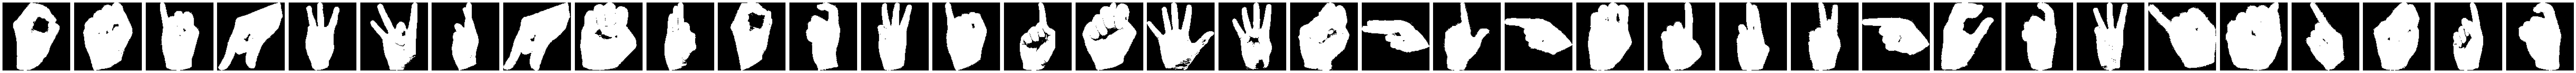

(36, 128, 128, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [157]:
train = r'C:\Users\RIMSHA\ML-project\dataset\train'
test = r'C:\Users\RIMSHA\ML-project\dataset\test'


#IMAGEDATA GENERATOR WORKING: 

#USING IMAGEDATAGENERATOR TO PROCESS THE IMAGES (DATASET) AND STORE THEM AS A BATCH IN -_batch variable.

#Accepting a batch of images used for training.
#Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
#Replacing the original batch with the new, randomly transformed batch.

train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train, target_size=(128,128), class_mode='categorical', batch_size=36,shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test, target_size=(128,128), class_mode='categorical', batch_size=36, shuffle=True)

#LOAD THE NEXT BATCH
images, labels = next(train_batch)

#PLOTTING THE PROCESSED IMAGES

def plotImages(data_array):
    figure, axis = plt.subplots(1, 36, figsize=(100,100))
    axes = axis.flatten()
    for image, axe in zip(data_array, axes):
        axe.imshow(image)
        axe.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(images)
print(images.shape)
print(labels)


In [158]:
#SEQUENTIAL MODEL USED OF PYTHON BUILT-IN LIBRARY KERAS

#WHY?

#IT IS USED WHEN ONE INPUT HAS ONLY ONE OUTPUT

#CNN WORKING
# INPUT + FILTER = CONVOLUTIONAL LAYER
#POOLING LAYER -> COMPRESSES THE OUTPUT OF CONVOLUTIONAL LAYER
#FLATTEN -> CONVERTS THE MATRIX (MULTIDIMENSIONAL ARRAY) INTO A SINGLE ARRAY (1D)
#FULLY FUNCTIONAL NEURAL NETWORK -> HIDDEN LAYER(DENSE LAYER) + OUTPUT LAYER

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

#RELU -> LINEAR ACTIVATION FUNCTION
#SOFTMAX -> ACTIVATION FUNCTION TO GIVE AN OUTPUT BETWEEN 0 AND 1
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(36, activation="softmax"))


In [159]:
#AFTER CREATING THE LAYERS, WE COMPILE THE MODEL
#IN THIS WE DEFINE FEW PARAMETERS :
  # OPTIMIZER -> IMPROVES ACCURACY BY DEFINING THE OPTIMIZATION ALGORITHIM SUCH AS SGD (STOCHASTIC GRADIENT DESCENT ALGO)
  # LOSS -> TO MEASURE THE LOSS (ERROR)
  # THE ACCURACY AND LOSS CALCULATED AFTER  EVERY EPOCH
  # IF VALIDATION LOSS NOT DESCREASING THEN LEARNING RATE IS REDUCED USING ReduceLROnPlateau.
  # IF THE VALIDATION ACCURACY KEEPS ON DECREASING THEN TRAINING IS STOPPED USING EarlyStopping
  # BOTH EARLYSTOP AND REDUCTION OF LEARNING RATE DEPENDS ON LOSS

#CALLBACKS -> performs the specified function at different stages in an epoch (start or end).
#both early stopping and reduce learning rate are classes of callbacks in keras.


model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduceLearningR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


In [160]:
#AFTER COMPILING THE MODEL, WE USE .fit() TO TRAIN THE MODEL

history = model.fit(train_batch, epochs = 4, callbacks = [reduceLearningR, earlyStop], validation_data = test_batch)

Epoch 1/4
70/70 [==============================] - 114s 2s/step - loss: 4.1599 - accuracy: 0.1437 - val_loss: 3.1737 - val_accuracy: 0.1698 - lr: 0.0010
Epoch 2/4
70/70 [==============================] - 45s 651ms/step - loss: 1.8526 - accuracy: 0.4845 - val_loss: 2.4994 - val_accuracy: 0.3754 - lr: 0.0010
Epoch 3/4
70/70 [==============================] - 42s 594ms/step - loss: 0.6644 - accuracy: 0.8087 - val_loss: 2.7981 - val_accuracy: 0.4579 - lr: 0.0010
Epoch 4/4
70/70 [==============================] - 80s 1s/step - loss: 0.2709 - accuracy: 0.9333 - val_loss: 2.2466 - val_accuracy: 0.5278 - lr: 5.0000e-04


In [161]:
#GET THE NEXT BATCH OF TEST IMAGES
images, labels = next(test_batch)

#EVALUATE THE TRAINED MODEL ON THE TEST DATASET
score = model.evaluate(images, labels, verbose = 0)

#PRINT THE SCORES -> LOSS AND ACCURACY
print(f'{model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
model.save('trainedModel.h5')

loss of 1.6137815713882446; accuracy of 61.11111044883728%


In [162]:
print(history.history)

{'loss': [4.15991735458374, 1.852592945098877, 0.6643780469894409, 0.270857572555542], 'accuracy': [0.14365079998970032, 0.48452380299568176, 0.8087301850318909, 0.9333333373069763], 'val_loss': [3.1736996173858643, 2.4993913173675537, 2.7981104850769043, 2.2466158866882324], 'val_accuracy': [0.16984127461910248, 0.37539681792259216, 0.45793649554252625, 0.5277777910232544], 'lr': [0.001, 0.001, 0.001, 0.0005]}


In [163]:
#model.summary() METHOD RETURNS KINDA THE WHOLE STRUCTURE OF MODEL 
# I.E THE LAYERS 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 64)     


y  p  One  One  c  Four  k  l  q  t  Four  Six  Nine  e  Four  j  q  v  k  q  h  t  Nine  Four  v  Zero  Six  Six  Six  i  n  One  v  Six  One  Six  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

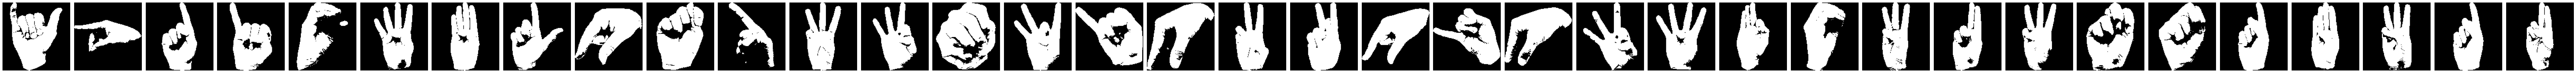

Actual Labels
y  p  One  i  c  Four  b  l  q  t  z  Six  Nine  m  Eight  j  q  v  k  q  j  q  Nine  Four  f  Zero  w  u  w  n  n  One  b  Six  One  u  
y  p  One  One  c  Four  k  l  q  t  Four  Six  Nine  e  Four  j  q  v  k  q  h  t  Nine  Four  v  Zero  Six  Six  Six  i  n  One  v  Six  One  Six  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

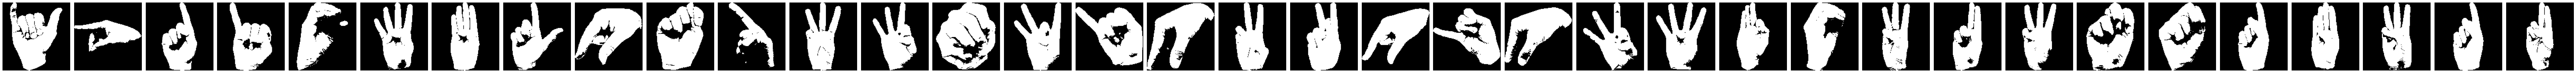

Actual Labels
y  p  One  i  c  Four  b  l  q  t  z  Six  Nine  m  Eight  j  q  v  k  q  j  q  Nine  Four  f  Zero  w  u  w  n  n  One  b  Six  One  u  

In [164]:
#TESTING THE TRAINED MODEL ON SMALL SET OF TEST DATASET

#DEFINE ACTUAL LABEL NAMES
labelNames = {0:'Zero', 1:'One', 2:'two', 3:'Three', 4:'Four', 5:'Five', 6:'Six', 7:'Seven', 8:'Eight', 9:'Nine',
              'a': 'a', 'b':'b', 'c':'c', 'd':'d', 'e':'e', 'f':'f', 'g':'g', 'h':'h', 'i':'i', 'j':'j', 'k':'k',
              'l': 'l', 'm':'m', 'n':'n', 'o':'o', 'p':'p', 'q':'q', 'r':'r', 's':'s', 't':'t', 'u':'u', 'v':'v',
              'w': 'w', 'x':'x', 'y':'y', 'z':'z' }

#To iterate over the labels, using numbers as keys for alphabets as well

labelNames2 = {0:'Zero', 1:'One', 2:'two', 3:'Three', 4:'Four', 5:'Five', 6:'Six', 7:'Seven', 8:'Eight', 9:'Nine',
              10: 'a', 11:'b', 12:'c', 13:'d', 14:'e', 15:'f', 16:'g', 17:'h', 18:'i', 19:'j', 20:'k',
              21: 'l', 22:'m', 23:'n', 24:'o', 25:'p', 26:'q', 27:'r', 28:'s', 29:'t', 30:'u', 31:'v',
              32: 'w', 33:'x', 34:'y', 35:'z' }
#PREDICT THE TEST DATA
predictions = model.predict(images, verbose = 0)
print("")

for i, j in enumerate(predictions):
    print(labelNames2[np.argmax(j)], end= '  ')
    
plotImages(images)
print('Actual Labels')
for i in labels:
    print(labelNames2[np.argmax(i)], end = '  ')
    

#PREDICT THE TEST DATA
predictions = model.predict(images, verbose = 0)
print("")

for i, j in enumerate(predictions):
    print(labelNames2[np.argmax(j)], end= '  ')
    
plotImages(images)
print('Actual Labels')
for i in labels:
    print(labelNames2[np.argmax(i)], end = '  ')
    